In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

# Datasets

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Information

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Features

* **survival:**  0 = No, 1 = Yes
* **pclass:**    1 = 1st, 2 = 2nd, 3 = 3rd  (Ticket class)
* **sex:**       
* **Age:**                                  (Age in years)
* **sibsp:**                                (of siblings / spouses aboard the Titanic)
* **parch:**                                (of parents / children aboard the Titanic)
* **ticket:**                               (Ticket number)
* **fare:**                                 (Passenger fare)
* **cabin:**                                (Cabin number)
* **embarked:** C = Cherbourg, Q = Queenstown, S = Southampton (Port of Embarkation	)

### Variable Notes

**pclass: A proxy for socio-economic status (SES)**
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

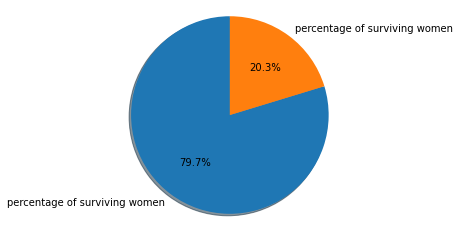

In [21]:
women = train.loc[train.Sex == 'female']['Survived']
male = train.loc[train.Sex == 'male']['Survived']

labels = ['percentage of surviving women', 'percentage of surviving women']
sizes = [sum(women)/len(women), sum(male)/len(male)]
explode = (0, 0)
                                             
fig1, ax1 = plt.subplots()
                        
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, normalize=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

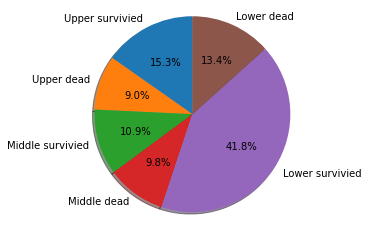

In [70]:
labels = []
sizes = []
cls = {1: 'Upper', 2: 'Middle', 3: 'Lower'}
for pclass in np.arange(1, 4, 1):
    [survived, dead] = train.loc[train.Pclass == pclass]['Survived'].value_counts()
    labels.append('%s survivied' % cls[pclass])
    labels.append('%s dead' % cls[pclass])
    sizes.append(survived)
    sizes.append(dead)
    
                                             
fig1, ax1 = plt.subplots()
                        
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, normalize=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [88]:
def confusion_matrix(y_test, predicted):
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    class_name = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_name))
    plt.xticks(tick_marks, class_name)
    plt.yticks(tick_marks, class_name)

    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Blues_r', fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Current Label')
    plt.xlabel('Predicted Label')

def test_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_predicted = model.predict(X_test)
    
    confusion_matrix(y_test, y_predicted)
    
    return (model, score, y_predicted)

# Model selection

In [97]:
from sklearn.ensemble import RandomForestClassifier

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
y = train['Survived']
X = pd.get_dummies(train[features])
X['Age'] = X['Age'].replace(np.nan, 0)

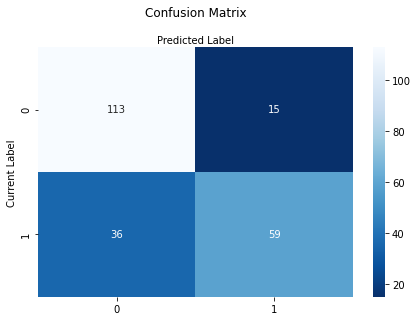

In [99]:
(model, score, y_predicted) = test_model(RandomForestClassifier(), X, y)

In [100]:
score

0.7713004484304933